# Airbnb Market Trends Analysis

## Project Overview

In this project, I explore key trends within the Airbnb market by analyzing listing prices, room types, and review activity. The goal is to uncover valuable insights that could be useful for Airbnb hosts, investors, or those interested in the short-term rental market.

### Objectives:
- Analyze room type distribution to understand market offerings.
- Calculate the average listing price.
- Examine review trends over time to identify user engagement.
- Summarize key metrics such as the earliest and latest review dates, number of private rooms, and average price.

## Data Overview

I work with three datasets:
1. **`airbnb_price.csv`**: Contains price information for Airbnb listings.
2. **`airbnb_room_type.xlsx`**: Contains details about the types of rooms offered (e.g., Private Room, Entire Home, etc.).
3. **`airbnb_last_review.tsv`**: Contains the date of the most recent review for each listing.

## Step-by-Step Analysis

### 1. Import Libraries

I start by importing the necessary libraries for data manipulation and visualization.

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Loading the Data

I load the data from the provided CSV, Excel, and TSV files into separate Pandas DataFrames.

In [133]:
price = pd.read_csv('/Users/burakemrekucuk/Desktop/Data Analysis Projects/Airbnb Market Trends/airbnb_price.csv')
room = pd.read_excel('/Users/burakemrekucuk/Desktop/Data Analysis Projects/Airbnb Market Trends/airbnb_room_type.xlsx')
review = pd.read_csv('/Users/burakemrekucuk/Desktop/Data Analysis Projects/Airbnb Market Trends/airbnb_last_review.tsv', sep='\t')

### 3. Data Inspection
I inspect the first few rows of each DataFrame to verify that the data has been loaded correctly.

In [138]:
# Check the first few rows of each DataFrame
print(price.head())
print(room.head())
print(review.head())

   listing_id        price                nbhood_full
0        2595  225 dollars         Manhattan, Midtown
1        3831   89 dollars     Brooklyn, Clinton Hill
2        5099  200 dollars     Manhattan, Murray Hill
3        5178   79 dollars  Manhattan, Hell's Kitchen
4        5238  150 dollars       Manhattan, Chinatown
   listing_id                                description        room_type
0        2595                      Skylit Midtown Castle  Entire home/apt
1        3831            Cozy Entire Floor of Brownstone  Entire home/apt
2        5099  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt
3        5178            Large Furnished Room Near B'way     private room
4        5238         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt
   listing_id    host_name   last_review
0        2595     Jennifer   May 21 2019
1        3831  LisaRoxanne  July 05 2019
2        5099        Chris  June 22 2019
3        5178     Shunichi  June 24 2019
4        5238          Ben 

### 4. Merging the DataFrames

To work with all the data together, I merge the price, room, and review DataFrames on the common listing_id column.

In [141]:
# Merge the DataFrames on 'listing_id'
merged_df = pd.merge(price, room, on='listing_id')
merged_df = pd.merge(merged_df, review, on='listing_id')

# Display the merged DataFrame
merged_df.head()

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
0,2595,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt,Jennifer,May 21 2019
1,3831,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,July 05 2019
2,5099,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,June 22 2019
3,5178,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,June 24 2019
4,5238,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,June 09 2019


### 5. Converting and Finding Review Dates

The last_review column is converted to the correct datetime format to enable analysis of review trends. I also calculate the first and last review dates in the dataset.

In [144]:
# Convert 'last_review' to datetime and find the earliest and most recent dates
review['last_review'] = pd.to_datetime(review['last_review'])

first_reviewed = review['last_review'].min()
last_reviewed = review['last_review'].max()

print(f"First reviewed date: {first_reviewed}")
print(f"Last reviewed date: {last_reviewed}")

First reviewed date: 2019-01-01 00:00:00
Last reviewed date: 2019-07-09 00:00:00


### 6. Counting Private Room Listings

I clean the room_type column by converting all text to lowercase to ensure consistency. Then, I count the number of listings that are private rooms.

In [154]:
# Clean 'room_type' and count private room listings
room['room_type'] = room['room_type'].str.lower()
private_room_count = room[room['room_type'] == 'private room'].shape[0]

print(f"Number of private room listings: {private_room_count}")

Number of private room listings: 11356


### 7. Visualizing Room Type Distribution

I visualize the distribution of different room types in the dataset using a bar chart. This helps us understand which types of rooms are most common on Airbnb.

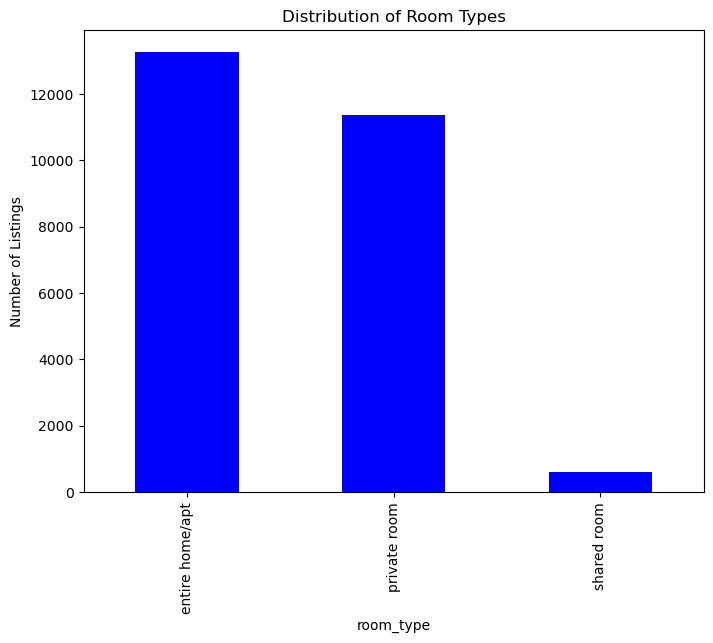

In [157]:
# Distribution of Room Types
room_type_counts = room['room_type'].value_counts()

# Bar plot for room type distribution
room_type_counts.plot(kind='bar', figsize=(8,6), title='Distribution of Room Types', color = 'blue')
plt.ylabel('Number of Listings')
plt.show()

### 8. Calculating the Average Price

To calculate the average listing price, I clean the price column by removing unwanted text and converting it to numeric values. The average price is then computed and rounded to two decimal places.

In [160]:
# Clean the 'price' column and calculate average price
price['price'] = price['price'].replace('dollars', '', regex=True).astype(float)
average_price = price['price'].mean()

# Round the average price to two decimal places
average_price = round(average_price,2)

print(f"Average price of listing: {average_price}")

Average price of listing: 141.78


### 9. Visualizing Review Trends Over Time

I analyze the number of reviews over time to track user engagement trends. A line plot is used to visualize the number of reviews per day.

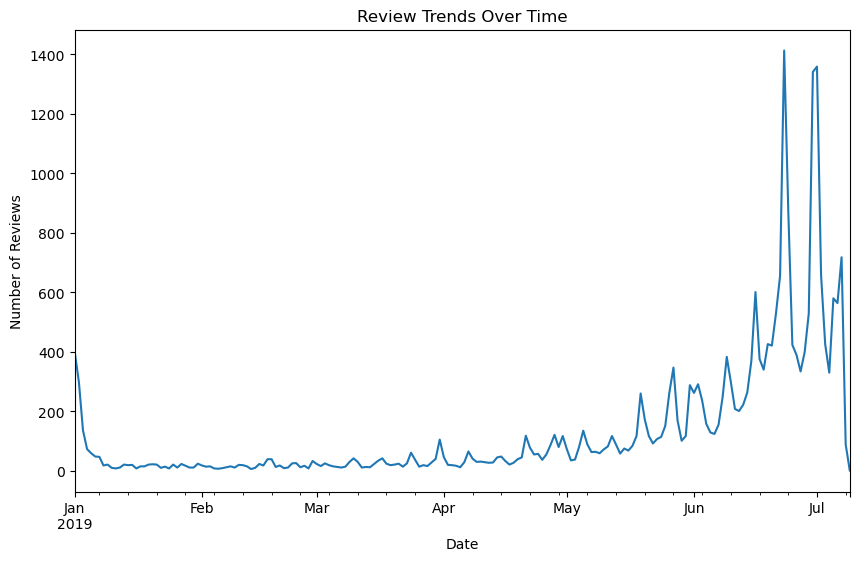

In [163]:
# Group by review date and count the number of reviews per day
reviews_over_time = review.groupby('last_review').size()

# Line plot for review trends over time
reviews_over_time.plot(kind='line', figsize=(10,6), title='Review Trends Over Time')
plt.ylabel('Number of Reviews')
plt.xlabel('Date')
plt.show()

### 10. Creating the Final DataFrame

Finally, I summarize the key insights (first and last review dates, number of private rooms, and average price) into a single-row DataFrame called review_dates.

In [168]:
# Create a DataFrame with the solution values
data = {
    'first_reviewed': [first_reviewed],
    'last_reviewed': [last_reviewed],
    'nb_private_rooms': [private_room_count],
    'average_price': [average_price] }

# Create the review_dates DataFrame
review_dates = pd.DataFrame(data)
review_dates

,first_reviewed,last_reviewed,nb_private_rooms,average_price
0,2019-01-01,2019-07-09,11356,141.78


## Key Findings

1. **Room Type Distribution**: I found that entire home or apartment is the most common room type in the dataset.
2. **Average Price**: The average price for Airbnb listings is approximately $141.78.
3. **Review Trends**: The review trends show a steady increase in user engagement from January until July, indicating a peak in activity during the mid-year, likely due to increased travel in summer. However, the drop in reviews toward the end of the year suggests a decline in activity, potentially due to off-peak travel periods or seasonal factors.
4. **Summary DataFrame**: The review_dates DataFrame consolidates the most important metrics.

## Conclusion

This project provides valuable insights into the Airbnb market, including room type distribution, pricing, and review trends. These findings can guide Airbnb hosts, investors, or analysts in making informed decisions about the short-term rental market.

By combining data analysis and visualization, this project demonstrates essential skills in data manipulation, cleaning, and presentation.